<a href="https://colab.research.google.com/github/igorjoz/machine-learning-course-and-projects/blob/main/12_Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wariancja Ataku: 1052.16
Wariancja Obrony: 971.20
Mediana Ataku: 75.0
Mediana Obrony: 70.0
Moda Ataku: ModeResult(mode=np.int64(100), count=np.int64(40))
Moda Obrony: ModeResult(mode=np.int64(70), count=np.int64(54))


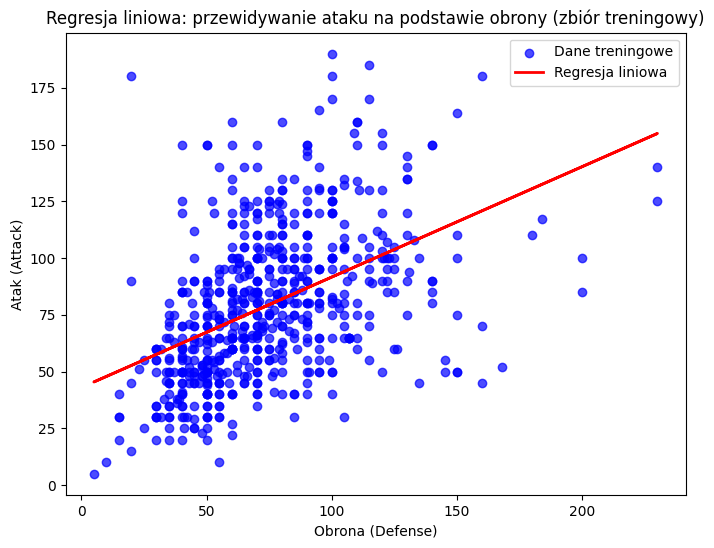

     Attack  Defense  Predicted Attack
640      69       85         84.334232
641      65       48         66.332165
642      59       58         71.197588
643      95      125        103.795926
644      85       70         77.036096


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

file_path = "Pokemon.csv"
df = pd.read_csv(file_path)

variance_attack = np.var(df["Attack"])
variance_defense = np.var(df["Defense"])

median_attack = np.median(df["Attack"])
median_defense = np.median(df["Defense"])

mode_attack = stats.mode(df["Attack"])
mode_defense = stats.mode(df["Defense"])

print(f"Wariancja Ataku: {variance_attack:.2f}")
print(f"Wariancja Obrony: {variance_defense:.2f}")
print(f"Mediana Ataku: {median_attack}")
print(f"Mediana Obrony: {median_defense}")
print(f"Moda Ataku: {mode_attack}")
print(f"Moda Obrony: {mode_defense}")

df = df.sample(frac=1, random_state=42).reset_index(drop=True)
split_index = int(0.8 * len(df))
df_train = df.iloc[:split_index]
df_test = df.iloc[split_index:]

X_train = df_train[["Defense"]]
y_train = df_train["Attack"]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(df_train["Defense"], df_train["Attack"], alpha=0.7, label="Dane treningowe", color="blue")
plt.plot(df_train["Defense"], y_pred_train, color="red", label="Regresja liniowa", linewidth=2)
plt.xlabel("Obrona (Defense)")
plt.ylabel("Atak (Attack)")
plt.title("Regresja liniowa: przewidywanie ataku na podstawie obrony (zbiór treningowy)")
plt.legend()
plt.show()

X_test = df_test[["Defense"]]
y_test = df_test["Attack"]
y_pred_test = model.predict(X_test)

df_results = df_test.copy()
df_results["Predicted Attack"] = y_pred_test
df_results = df_results[["Attack", "Defense", "Predicted Attack"]]
print(df_results.head())

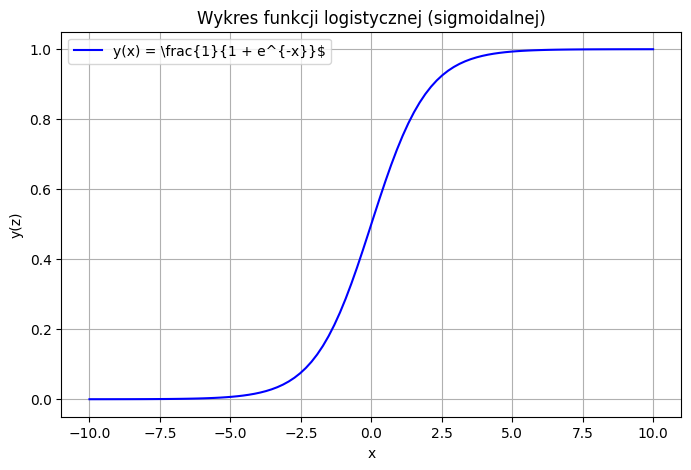

In [ ]:
#Funkcja sigmoidalna

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generowanie wartości wejściowych
x = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(x)

plt.figure(figsize=(8, 5))
plt.plot(x, sigmoid_values, label=r'y(x) = \frac{1}{1 + e^{-x}}$', color='blue')
plt.xlabel('x')
plt.ylabel('y(z)')
plt.title('Wykres funkcji logistycznej (sigmoidalnej)')
plt.legend()
plt.grid()
plt.show()

<ipython-input-4-946176b3907c>:78: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[correct_mask, 0], X_test[correct_mask, 1],


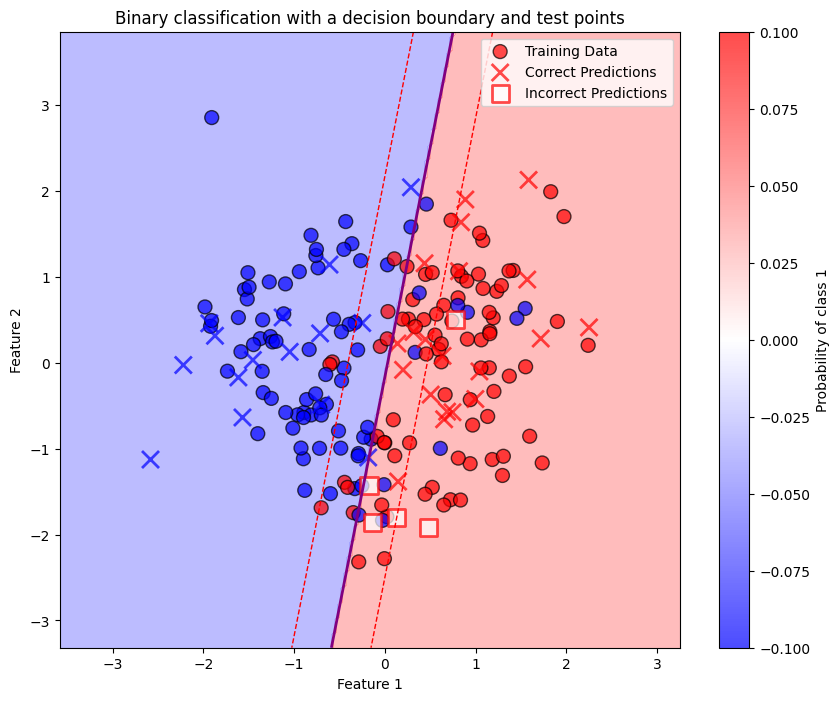

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import random

def zscore_normalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

def create_train_and_test_sets(X,Y):
    random.seed(420)
    X = np.array(X)
    Y = np.array(Y)

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split_point = int(0.8 * len(X))

    train_indices = indices[:split_point]
    test_indices = indices[split_point:]

    X_train = X[train_indices]
    Y_train = Y[train_indices]
    X_test = X[test_indices]
    Y_test = Y[test_indices]

    return X_train, X_test, Y_train, Y_test


# 📌 1. Generowanie danych do klasyfikacji binarnej
X, Y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# 📌 2. Normalizacja danych (skalowanie)
X = zscore_normalization(X)


# 📌 3. Podział danych na zbiór treningowy i testowy
X_train, X_test, Y_train, Y_test = create_train_and_test_sets(X,Y)


# 📌 4. Trening modelu klasyfikacji binarnej (Regresja Logistyczna)
model = LogisticRegression()
model.fit(X_train, Y_train)
# I Dokonanie predykcji
Y_test_pred = model.predict(X_test)

# 📌 5. Wizualizacja wyników: Punkty danych i linia decyzyjna
def plot_regression(X_train, y_train, X_test, y_test, y_test_pred, model):
    plt.figure(figsize=(10, 8))

    # Tworzymy siatkę punktów do wizualizacji granicy decyzyjnej
    x_min, x_max = min(X_train[:, 0].min(), X_test[:, 0].min()) - 1, max(X_train[:, 0].max(), X_test[:, 0].max()) + 1
    y_min, y_max = min(X_train[:, 1].min(), X_test[:, 1].min()) - 1, max(X_train[:, 1].max(), X_test[:, 1].max()) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    # Przewidywanie klas dla siatki punktów
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Rysowanie konturów granicy decyzyjnej
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)

    # Rysowanie prawdopodobieństwa dla siatki punktów (krzywa regresji)
    Z_prob = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z_prob = Z_prob.reshape(xx.shape)
    plt.contour(xx, yy, Z_prob, levels=[0.25, 0.5, 0.75], colors=['red', 'purple', 'red'],
                linestyles=['--', '-', '--'], linewidths=[1, 2, 1])

    # Rysowanie punktów treningowych
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k',
               cmap=plt.cm.bwr, marker='o', s=100, alpha=0.7, label='Training Data')

    # Rysowanie punktów testowych (poprawnie sklasyfikowanych)
    correct_mask = y_test == y_test_pred
    plt.scatter(X_test[correct_mask, 0], X_test[correct_mask, 1],
               c=y_test_pred[correct_mask], edgecolors='k', cmap=plt.cm.bwr,
               marker='x', s=150, linewidth=2, alpha=0.7, label='Correct Predictions')

    # Rysowanie punktów testowych (błędnie sklasyfikowanych)
    incorrect_mask = y_test != y_test_pred
    plt.scatter(X_test[incorrect_mask, 0], X_test[incorrect_mask, 1],
               c=y_test[incorrect_mask], edgecolors='red', cmap=plt.cm.bwr,
               marker='s', s=150, linewidth=2, alpha=0.7, label='Incorrect Predictions')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Binary classification with a decision boundary and test points")
    plt.legend()
    plt.colorbar(label='Probability of class 1')
    plt.show()

# 📌 Rysowanie granicy decyzyjnej dla zbioru treningowego i testowego
plot_regression(X_train, Y_train, X_test, Y_test, Y_test_pred, model)




In [ ]:
def calculate_confusion_matrix(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    conf_matrix = np.zeros((2, 2))

    conf_matrix[0, 0] = np.sum((y_true == 0) & (y_pred == 0))
    conf_matrix[0, 1] = np.sum((y_true == 0) & (y_pred == 1))
    conf_matrix[1, 0] = np.sum((y_true == 1) & (y_pred == 0))
    conf_matrix[1, 1] = np.sum((y_true == 1) & (y_pred == 1))

    return conf_matrix

def calculate_metrics(y_true, y_pred):
    conf_matrix = calculate_confusion_matrix(y_true, y_pred)

    TN, FP = conf_matrix[0]
    FN, TP = conf_matrix[1]

    accuracy = (TP + TN) / (TP + TN + FP + FN)

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = calculate_metrics(Y_test, Y_test_pred)

print(f"Dokładność (Accuracy): {accuracy:.3f}")
print(f"Precyzja (Precision): {precision:.3f}")
print(f"Czułość (Recall): {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

print("\nMacierz pomyłek (Confusion Matrix):")
conf_matrix = calculate_confusion_matrix(Y_test, Y_test_pred)
print(conf_matrix)


Dokładność (Accuracy): 0.900
Precyzja (Precision): 0.864
Czułość (Recall): 0.950
F1 Score: 0.905

Macierz pomyłek (Confusion Matrix):
[[17.  3.]
 [ 1. 19.]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("\nMetryki klasyfikacji:")
print("-" * 50)

# Podstawowe metryki
accuracy = accuracy_score(Y_test, Y_test_pred)
precision = precision_score(Y_test, Y_test_pred)
recall = recall_score(Y_test, Y_test_pred)
f1 = f1_score(Y_test, Y_test_pred)

print(f"Dokładność (Accuracy): {accuracy:.3f}")
print(f"Precyzja (Precision): {precision:.3f}")
print(f"Czułość (Recall): {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Macierz pomyłek
print("\nMacierz pomyłek (Confusion Matrix):")
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
print(conf_matrix)

# Szczegółowy raport klasyfikacji
print("\nSzczegółowy raport klasyfikacji:")
print(classification_report(Y_test, Y_test_pred))


Metryki klasyfikacji:
--------------------------------------------------
Dokładność (Accuracy): 0.900
Precyzja (Precision): 0.864
Czułość (Recall): 0.950
F1 Score: 0.905

Macierz pomyłek (Confusion Matrix):
[[17  3]
 [ 1 19]]

Szczegółowy raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.86      0.95      0.90        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

